In [1]:
import numpy as np
import pandas as pd
import sklearn as sk
import time
import datetime

In [2]:
data= pd.read_csv('C:/Users/Devanshu/Desktop/DataScienceIntern_test_case/zipjet_test_case/orders.csv', sep=',',header=0)

# Task 1 and 2 are solved from one code cell only.

Average calculation is done based on the summation of revenue by total number of orders done by customer. Code shown below writes output to file where following features are written: 1- customer_id,2- Total_rev,3- no_order,4- AOV. 

Total_rev= Gross revenue from each customer.
no_order= Total number of order from each customer.
AOV= Average revenue from each customer.

In [3]:
# Average calculation per customer

def average():
    average.custo_id=[]
    average.full=[]
    for i in data.customer :
        total_rev= data.revenue[data.customer== i].sum()
        total_order= len(data.order[data.customer== i])
        AOV= total_rev/total_order
        combined_value=([i,total_rev,total_order,AOV])
        # If you want to visualize the results then just remove # from below print function. 
        #print(i,total_rev,total_order,AOV)
        if i not in average.custo_id:
            average.custo_id.append(i)
            average.full.append(combined_value)
average()
np.savetxt('C:/Users/Devanshu/Desktop/DataScienceIntern_test_case/zipjet_test_case/data_per_customer.csv', average.full,delimiter=',',header="customer_id,total_rev,total_no_order,AOV",fmt="%i",comments='')

# Task 3: Plot AOV vs order levels per city.

Here The AOV and total no of order for each city are calculated by splilting order section to only city initial.

In [4]:
# Splitting order based on city initial

new_df= data
split= new_df.order.str.split('-',expand=True)
new_df2= pd.DataFrame({'order': split[0]})
new_df.update(new_df2, overwrite= True)

total_rev= new_df.groupby(['order'], as_index=False).revenue.sum()
print('Total revenue of DE',total_rev.revenue[0],'Total revenue of FR',total_rev.revenue[1],'Total revenue of GB',total_rev.revenue[2])

uni_city,uni_city_count = np.unique([new_df.order], return_counts= True)
print('city:',uni_city,'Total no of orders per city:',uni_city_count)

aov= []

aov.append(total_rev.revenue[0] / uni_city_count[0])
aov.append(total_rev.revenue[1] / uni_city_count[1])
aov.append(total_rev.revenue[2] / uni_city_count[2])

pop1= total_rev.revenue[0] / uni_city_count[0]
pop2= total_rev.revenue[1] / uni_city_count[1]
pop3= total_rev.revenue[2] / uni_city_count[2]

print('Avg revenue per city',aov)

Total revenue of DE 923297 Total revenue of FR 672534 Total revenue of GB 3300339
city: ['DE' 'FR' 'GB'] Total no of orders per city: [27615 15934 76451]
Avg revenue per city [33.43461886655803, 42.20748085854149, 43.16933722253469]


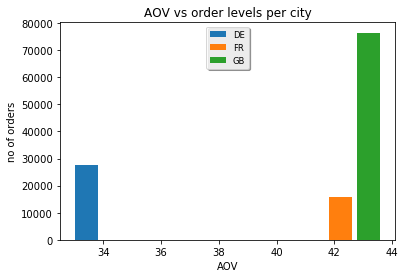

In [5]:
import matplotlib.pyplot as plt
import numpy as np
 
fig, ax= plt.subplots()
ax.bar(aov[0], uni_city_count[0], label='DE')
ax.bar(aov[1], uni_city_count[1], label='FR')
ax.bar(aov[2], uni_city_count[2], label='GB')

ax.set_ylabel('no of orders')
ax.set_xlabel('AOV')
ax.set_title('AOV vs order levels per city')

legend = ax.legend(loc='upper center', shadow=True, fontsize='small')
plt.show()

# Graph understanding
Here the graph is plotted as average revenue for each city given the total number of order per city. Here we can see that  avg revenue for 'DE : berlin' against number of orders is 33.43. Berlin has more orders compared to FR but then also the revenue is less. This can be because of less frequent customer. Compared to DE and FR, GB is having high revenue as well as orders. This shows that service is appealing new customers and old customers are retained as well. 

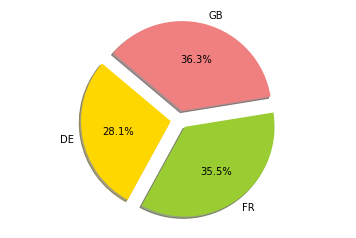

In [6]:
import matplotlib.pyplot as plt
 
# Data to plot
labels = 'DE', 'FR', 'GB'
sizes = [pop1, pop2, pop3]
colors = ['gold', 'yellowgreen', 'lightcoral']
explode = (0.1, 0.1, 0.1)
 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')
plt.show()

AOV vs Order per city suffices that even though the number of order in 'DE' are more compared to 'FR' but the customers of 'FR' access services with high value for example if there is a service for washing and pressing Suits with high prices then 'FR' customers are preferring them compared to 'DE' who places for orders with regular clothes which is low on pricing. 

# Task 4: Create four clusters using AOV and order levels per operating city and visualize them:

segment 1 : customers that placed few orders with low AOV
segment 2 : customers that placed few orders with high AOV
segment 3 : customers that placed many orders with low AOV
segment 4 : customers that placed many orders with high AOV.


In [7]:
# Load data from file created during calculating avg and total no of orders for each individual
customer_data= pd.read_csv('C:/Users/Devanshu/Desktop/DataScienceIntern_test_case/zipjet_test_case/data_per_customer.csv',sep=',',header=0)

#method defined for creating clusters
def cluster1() :
    # Segment are array having customer id when processed through loop
    cluster1.segment1=[] #low order :low AOV
    cluster1.segment2=[] #low order :High AOV
    cluster1.segment3=[] #high order :low AOV
    cluster1.segment4=[] #high order :High AOV
    
    # Mean value from total AOV values including all unique customers. Standard deviation is another option to categorize customers 
    mean_aov=customer_data.AOV.mean()
    
    # Min values for orders are decided by user and can also be divide by mean of orders but it fails at number of occasion for this case
    min_order=5

    for i in customer_data.customer_id :
        fr1= customer_data.total_no_order[customer_data.customer_id == i]
        fr2= customer_data.AOV[customer_data.customer_id == i]
        #print('customer_id',i)
        for j in fr1:
            #print('value of j',j)
            #print('customer_order',fr1)
            for k in fr2 :
                #print('customer_AOV',fr2)
                if j <= min_order and k <= mean_aov :
                    cluster1.segment1.append(i)
                elif j <= min_order and k >= mean_aov :
                    cluster1.segment2.append(i)
                elif j > min_order and k <= mean_aov :
                    cluster1.segment3.append(i)
                elif j > min_order and k >= mean_aov :
                    cluster1.segment4.append(i)
                
        
cluster1()

To visualize how effective a particular cluster we have to calculate total revenue from each cluster so that we can justify the importance of a cluster in each group of clusters.

In [8]:
# Calculate total avg revenue from each cluster
# Load data from file created during calculating avg and total no of orders for each individual
customer_data= pd.read_csv('C:/Users/Devanshu/Desktop/DataScienceIntern_test_case/zipjet_test_case/data_per_customer.csv',sep=',',header=0)

def internal_aov():
    
    internal_aov.summation1=0
    internal_aov.summation2=0
    internal_aov.summation3=0
    internal_aov.summation4=0
    
    for i in cluster1.segment1 :
        th1= customer_data.AOV[customer_data.customer_id==i]
        for j in th1 :
            internal_aov.summation1=internal_aov.summation1+j 
    for k in cluster1.segment2:
        th2= customer_data.AOV[customer_data.customer_id==k]
        for l in th2 :
            internal_aov.summation2=internal_aov.summation2+l 
    for m in cluster1.segment3:
        th3= customer_data.AOV[customer_data.customer_id==m]
        for n in th3 :
            internal_aov.summation3=internal_aov.summation3+n 
    for o in cluster1.segment4:
        th4= customer_data.AOV[customer_data.customer_id==o]
        for p in th4 :
            internal_aov.summation4=internal_aov.summation4+p 

internal_aov()
total_rev_from_data= sum(customer_data.AOV)

The graph below shows how is the performance of each cluster compared to revenue from highest cluster.

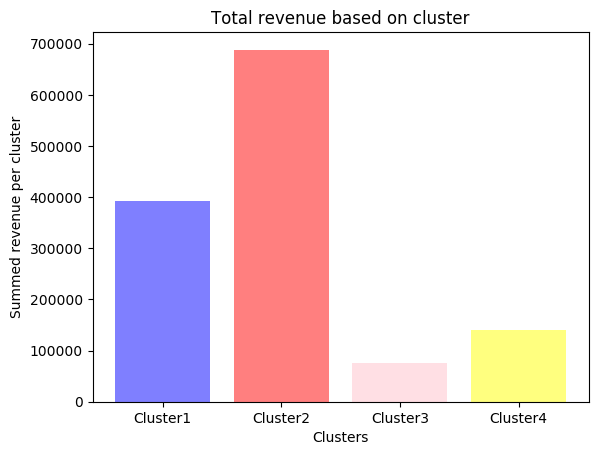

Cluster1 Rev: 392257 cluster2 Rev: 688271 cluster3 Rev: 76452 cluster4 Rev: 139863


In [10]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
objects = ('Cluster1', 'Cluster2', 'Cluster3', 'Cluster4')
y_pos = np.arange(len(objects))
performance = [internal_aov.summation1,internal_aov.summation2,internal_aov.summation3,internal_aov.summation4]
plt.bar(y_pos, performance,color=['blue','red','pink','yellow'] ,align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.xlabel('Clusters')
plt.ylabel('Summed revenue per cluster')
plt.title('Total revenue based on cluster')
plt.show()

print('Cluster1 Rev:',internal_aov.summation1,'cluster2 Rev:',internal_aov.summation2,'cluster3 Rev:',internal_aov.summation3,'cluster4 Rev:',internal_aov.summation4)

# Cluster visualization understanding
Here each cluster consist of customers as per criteria. These clusters makes us understand what should be our focus on. Here cluster 1 majorly has customers with zero frequency of orders but this also means marketing team is efficient with attracting crowd to zipjet platform. Cluster 2 has more revenue and also contains customers with few frequency of orders. Retention rate needs to be increased on cluster 1 and cluster 2. Cluster 3 are the ones with more number of orders but everytime the revenue is less because it the services they are choosing are cheap. Cluster 4 are the one with high order and also generates high reveue. They can be treated with some more services or discounts to keep them intact.

# Task 5. Assign marketing channel to customer based on his/her first order

Here I have sorted data based on datetime so that for each customer we have there first date of order at first place.

In [11]:
# assigning marketing channel

channel= data

channel['order_created_datetime'] =pd.to_datetime(channel.order_created_datetime)
ch= channel.sort_values('order_created_datetime')

def channel_set ():
    channel_set.customer=[]
    channel_set.customer_channel= []
    for i in ch.customer:
        
        if i not in channel_set.customer:
            channel_set.customer.append(i)
            acv= ch.market_channel[ch.customer==i]
            combi= ([i,acv])
            
            channel_set.customer_channel.append(combi)
channel_set()
np.savetxt('C:/Users/Devanshu/Desktop/DataScienceIntern_test_case/zipjet_test_case/Customer_Channel.csv', channel_set.customer_channel,delimiter=',',fmt='%5s',header="Customer_channel",comments='')

# Task 6: Find out what are the marketing channels from which segment 4 customers come,provide visualizations and comment on your findings.

In [12]:
# Focusing on High order and High revenue customers

data2= pd.read_csv('C:/Users/Devanshu/Desktop/DataScienceIntern_test_case/zipjet_test_case/orders.csv', sep=',',header=0)

def segment4_channel():
    segment4_channel.cluster_seg4=[]
    channel_unique,channel_unique_counts= np.unique(data2.market_channel,return_counts=True)
    print('unique_cha',channel_unique,'unique_counts',channel_unique_counts)
    for i in channel_unique:
        customer_id_data= data2.customer[data2.market_channel==i]
        for j in customer_id_data:
            if j in cluster1.segment4:
                jk=([i,j])
                segment4_channel.cluster_seg4.append(jk)
                
segment4_channel()
np.savetxt('C:/Users/Devanshu/Desktop/DataScienceIntern_test_case/zipjet_test_case/channel_segment4.csv',segment4_channel.cluster_seg4,delimiter=',',header="channel,customer_id",fmt='%5s',comments='')

unique_cha ['a' 'aa' 'b' 'bb' 'c' 'cc' 'd' 'dd' 'e' 'f' 'g' 'h' 'i' 'j' 'k' 'l' 'm'
 'n' 'o' 'p' 'q' 'r' 's' 't' 'u' 'v' 'w' 'x' 'y' 'z'] unique_counts [ 4893    69  7563     1 65264    16  1044     4  4406  1299  1011   988
  8209   542   286  1435  6521   386  1017    75 12059   211   901   190
     4    47    73   844   175   467]


# Note
The output file channel_segment4.csv has some problem with writing so everytime for one customer there will be a space before the channel name which hinders the visualization. Kindly filter channel c from file and copy paste it over all channel c customers.

['    a' '    b' '    c' '    d' '    e' '    f' '    g' '    h' '    i'
 '    j' '    k' '    l' '    m' '    n' '    o' '    p' '    q' '    r'
 '    s' '    t' '    v' '    w' '    x' '    y' '    z' '   aa'] [  797  1066 21676    22  1125   192   232   205  1277     2    73   680
  2123   137    28    13  2200     7    49     1     4    34    27     4
    10     3]


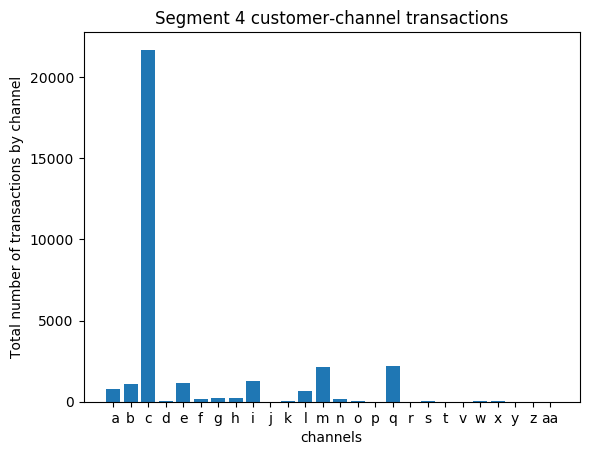

In [13]:
# Visualize the channels for specific cluster

channel_segment_4= pd.read_csv('C:/Users/Devanshu/Desktop/DataScienceIntern_test_case/zipjet_test_case/channel_segment4.csv',sep=',')
final_channel,final_count= np.unique(channel_segment_4.channel,return_counts=True)
print(final_channel,final_count)

import matplotlib.pyplot as plt
import numpy as np
 
objects= [' a' ,'b','c','d','e' ,'f', 'g', 'h', 'i','j','k','l', 'm','n', 'o','p' ,'q', 'r','s', 't', 'v','w', 'x','y','z','aa']
y_pos= np.arange(len(objects))

plt.bar(y_pos,final_count)

plt.xticks(y_pos, objects)
plt.xlabel('channels')
plt.ylabel('Total number of transactions by channel')
plt.title('Segment 4 customer-channel transactions')
plt.show()

Here It clearly show all the customers who are using the service on regular basis use the marketing channel 'C' most of the times. This results shows how effective the marketing channel is and is easily reachable to customers. Even at any case channel c will be reliable to advertise more. This results for value purpose can be used to project that to retrieve customers with less orders can be reatined if they are diverted to channel 'C'. There will be cases where customer even using channel C, they just ordere for once ot twice and for that we have to build another strategy to redem them rather then just rely on one parameter 'channel'.

# Task 7. Calculate frequency (average interval in days between orders) per customer

Frequency is calculated based on days difference between first and last date of order and during that span how many orders we placed by the customer.

In [14]:
# Frequent customer order patter
freq1= data
freq1['order_created_datetime'] =pd.to_datetime(freq1.order_created_datetime)
freq1['order_created_datetime']= [d.date() for d in freq1['order_created_datetime']]
freq2= freq1.sort_values(by='order_created_datetime')

freq2=freq2.reset_index(drop=True)

def frequency_customer():
    frequency_customer.customer=[] 
    frequency_customer.gaps=[]
    frequency_customer.gaps_customer=[]
    uni_freq = pd.unique(freq2.customer)
    for i in uni_freq :
        adf= freq2.order_created_datetime[freq2.customer==i].values
        date_min= min(adf)
        date_max= max(adf)
        gaps= date_max- date_min
        order_num= len(freq2.order_created_datetime[freq2.customer==i].values)
        frequency_of_customer= (gaps/order_num)
        if i not in frequency_customer.customer :
            frequency_customer.customer.append(i)
            frequency_customer.gaps.append(gaps)
            combine_value=([i,frequency_of_customer])
            frequency_customer.gaps_customer.append(combine_value)

frequency_customer()
np.savetxt('C:/Users/Devanshu/Desktop/DataScienceIntern_test_case/zipjet_test_case/Customer_frequency.csv', frequency_customer.gaps_customer,delimiter=',',fmt='%5s',header="customer,frequency",comments='')